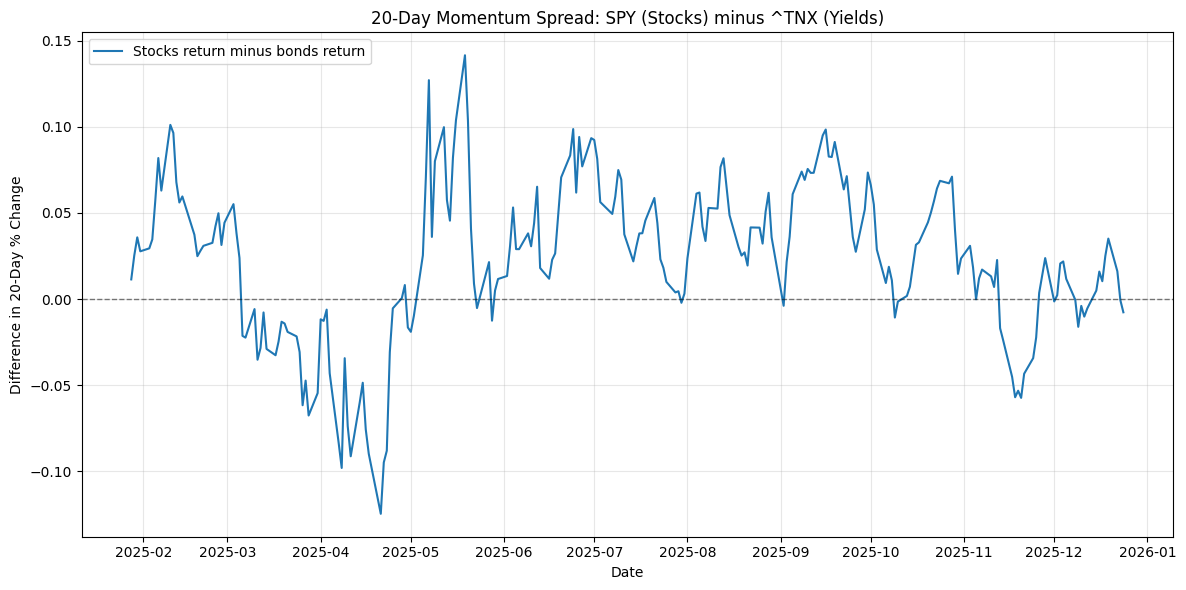

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define tickers and timeframe
  # SPY = S&P 500 ETF
  # ^TNX = 10-Year Yield (Interest Rate)
  # fetch adjusted closing prices for both tickers
  # yfinance defaults auto_adjust=True that define closeing prices as 'Close'
tickers = ['SPY', '^TNX']
data = yf.download(tickers, period='12mo', auto_adjust=True, progress=False) ['Close']

# Calculate 20-Day Rolling Returns (Percentage Change)
returns_20d = data.pct_change(20).dropna()

# Calculate the spread
  # "Stocks return minus bonds return"
returns_20d['Spread'] = returns_20d['SPY'] - returns_20d['^TNX']

# Generate plot
  # plot the single combined line
  # add zero line for reference (Positive = Stocks Outperforming Yields)
plt.figure(figsize=(12, 6))
plt.plot(returns_20d.index, returns_20d['Spread'], label='Stocks return minus bonds return')
plt.axhline(0, color='black', linewidth=1, linestyle='--', alpha=0.5)

plt.title('20-Day Momentum Spread: SPY (Stocks) minus ^TNX (Yields)')
plt.ylabel('Difference in 20-Day % Change')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()